In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
# read data
df = pd.read_csv("data/AC_accidents_INPUTS.csv")
df

,date,time,location,airline_operator,flight_no,route,aircraft_type,aircraft_registration,construction_fuselage_number,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,total_killed_ground,summary
0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,"March 28, 2021",1835,"Near Butte, Alaska",Soloy Helicopters,?,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,N351SH,4598,6,5,1,5,4,1,0,The sightseeing helicopter crashed after missi...
5004,"May 21, 2021",1800,"Near Kaduna, Nigeria",Military - Nigerian Air Force,?,?,Beechcraft B300 King Air 350i,NAF203,FL-891,11,7,4,11,7,4,0,"While on final approach, in poor weather condi..."
5005,"June 10, 2021",0800,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,?,Naypyidaw - Anisakan,Beechcraft 1900D,4610,E-325,14,12,2,12,11,1,0,The plane was carrying military personnel and ...
5006,"July 04, 2021",11:30,"Patikul, Sulu, Philippines",Military - Philippine Air Force,?,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,5125,5125,96,88,8,50,?,?,3,"While attempting to land at Jolo Airport, the ..."


In [3]:
# unique values per column
df.nunique()

date                            4577
time                            1217
location                        4125
airline_operator                2268
flight_no                        893
route                           3838
aircraft_type                   2469
aircraft_registration           4701
construction_fuselage_number    3908
total_aboard                     245
passengers_aboard                235
crew_aboard                       35
total_fatalities                 200
passengers_fatalities            191
crew_fatalities                   29
total_killed_ground               52
summary                         4858
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   date                          5008 non-null   object
 1   time                          5008 non-null   object
 2   location                      5008 non-null   object
 3   airline_operator              5008 non-null   object
 4   flight_no                     5008 non-null   object
 5   route                         5007 non-null   object
 6   aircraft_type                 5008 non-null   object
 7   aircraft_registration         5008 non-null   object
 8   construction_fuselage_number  5008 non-null   object
 9   total_aboard                  5008 non-null   object
 10  passengers_aboard             5008 non-null   object
 11  crew_aboard                   5008 non-null   object
 12  total_fatalities              5008 non-null   object
 13  passengers_fatalit

In [5]:
# changue data type to column "date"
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

In [6]:
# changue to numeric date type 
df['passengers_aboard'] = pd.to_numeric(df['passengers_aboard'], errors="coerce")       
df['crew_aboard'] = pd.to_numeric(df['crew_aboard'], errors="coerce")         
df['total_fatalities'] = pd.to_numeric(df['total_fatalities'], errors="coerce")  
df['passengers_fatalities'] = pd.to_numeric(df['passengers_fatalities'], errors="coerce") 
df['crew_fatalities'] = pd.to_numeric(df['crew_fatalities'], errors="coerce")            
df['total_killed_ground'] = pd.to_numeric(df['total_killed_ground'], errors="coerce") 
df['total_aboard'] = pd.to_numeric(df['total_aboard'], errors="coerce")

In [7]:
df.select_dtypes(include=['object']).columns

Index(['time', 'location', 'airline_operator', 'flight_no', 'route',
       'aircraft_type', 'aircraft_registration',
       'construction_fuselage_number', 'summary'],
      dtype='object')

In [8]:
# Replace unknown values with NaN
df.replace("?", np.NAN, inplace=True)
df.isna().sum()

date                               0
time                            1504
location                           5
airline_operator                  10
flight_no                       3682
route                            763
aircraft_type                     13
aircraft_registration            272
construction_fuselage_number     667
total_aboard                      17
passengers_aboard                221
crew_aboard                      219
total_fatalities                   8
passengers_fatalities            235
crew_fatalities                  235
total_killed_ground               44
summary                           59
dtype: int64

In [9]:
# Delete columns that are not important for our analysis
df.drop(columns=['aircraft_registration', 'flight_no','construction_fuselage_number', 'aircraft_registration','total_killed_ground','summary'], inplace = True)
df 

,date,time,location,airline_operator,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities
0,1908-09-17,1718,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2.0,1.0,1.0,1.0,1.0,0.0
1,1909-09-07,NaN,"Juvisy-sur-Orge, France",NaN,Air show,Wright Byplane,1.0,0.0,1.0,1.0,0.0,0.0
2,1912-07-12,0630,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,0.0,5.0,5.0,0.0,5.0
3,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,1.0,0.0,1.0,1.0,0.0,1.0
4,1913-09-09,1830,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),20.0,NaN,NaN,14.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5003,2021-03-28,1835,"Near Butte, Alaska",Soloy Helicopters,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,6.0,5.0,1.0,5.0,4.0,1.0
5004,2021-05-21,1800,"Near Kaduna, Nigeria",Military - Nigerian Air Force,NaN,Beechcraft B300 King Air 350i,11.0,7.0,4.0,11.0,7.0,4.0
5005,2021-06-10,0800,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,Naypyidaw - Anisakan,Beechcraft 1900D,14.0,12.0,2.0,12.0,11.0,1.0
5006,2021-07-04,11:30,"Patikul, Sulu, Philippines",Military - Philippine Air Force,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,96.0,88.0,8.0,50.0,NaN,NaN


In [10]:
# check Nan values per column
df.isna().sum()

date                        0
time                     1504
location                    5
airline_operator           10
route                     763
aircraft_type              13
total_aboard               17
passengers_aboard         221
crew_aboard               219
total_fatalities            8
passengers_fatalities     235
crew_fatalities           235
dtype: int64

In [11]:
# create column "hour"
df['hour'] = df['time'].str[:2]

In [12]:
# We see that there are inconsistent values
df['hour'].unique()

array(['17', nan, '06', '18', '10', '01', '15', '23', '05', '08', '07',
       '21', '16', '12', '11', '13', 'c ', '09', '04', '14', 'c:', '02',
       '22', '20', '19', '00', '03', '0:', '90', '1:', '24'], dtype=object)

In [13]:
df['time'] = df['time'].str.replace("c ", '').str.replace("0:", '00').str.replace('c:','').str.replace('1:','01').str.replace('9:','09').str.replace(' 2','02').str.replace('90','09')

In [14]:
df[df['hour']=='24']

,date,time,location,airline_operator,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,hour
3117,1981-03-15,245,"Shemya AFB, Alaska",Military - U.S. Air Force,Eielson AFB-Shemya AFB,Boeing RC-135S,24.0,NaN,NaN,6.0,NaN,NaN,24


In [15]:
df[df['hour']=='90']

,date,time,location,airline_operator,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,hour
2140,1965-01-17,090,"Near Durango, Mexico",Aerovias del Norte,Durango Zapotes,Curtiss C-46,10.0,7.0,3.0,10.0,7.0,3.0,90


In [16]:
df.loc[3117, 'time'] = '0245'
df.loc[2140, 'time'] = '0900'

In [17]:
df['hour'] = df['time'].str[:2]
df['hour'] = df['hour'].astype('int', errors='ignore')

In [18]:
accidents_by_hour = df['hour'].value_counts().to_frame().reset_index().sort_values('hour')

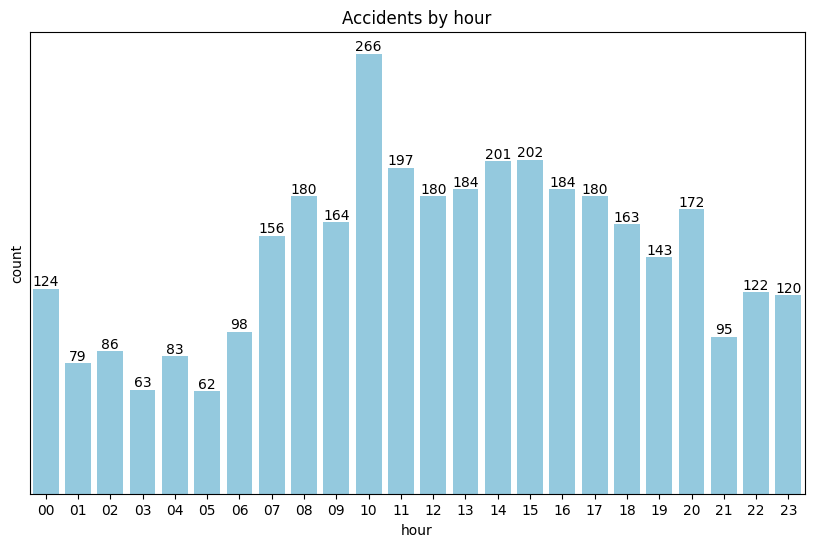

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(data=accidents_by_hour, x='hour', y='count',order=accidents_by_hour['hour'], color='skyblue')
plt.title("Accidents by hour")
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2, height),
                       ha='center', va='bottom')
plt.yticks([],[])
plt.show()

In [20]:
# delete rows that have Nan Values for some columns
df = df.dropna(subset=['aircraft_type','airline_operator','location','route','passengers_aboard','crew_aboard','total_fatalities','passengers_fatalities','crew_fatalities'])
df.isna().sum()

date                       0
time                     938
location                   0
airline_operator           0
route                      0
aircraft_type              0
total_aboard               0
passengers_aboard          0
crew_aboard                0
total_fatalities           0
passengers_fatalities      0
crew_fatalities            0
hour                     938
dtype: int64

In [21]:
df.nunique()

date                     3851
time                     1147
location                 3455
airline_operator         1998
route                    3767
aircraft_type            2145
total_aboard              242
passengers_aboard         234
crew_aboard                30
total_fatalities          199
passengers_fatalities     190
crew_fatalities            26
hour                       24
dtype: int64

In [22]:
fatalities_by_year = df.set_index('date').resample('y')['total_fatalities'].sum()

<Axes: xlabel='date', ylabel='total_fatalities'>

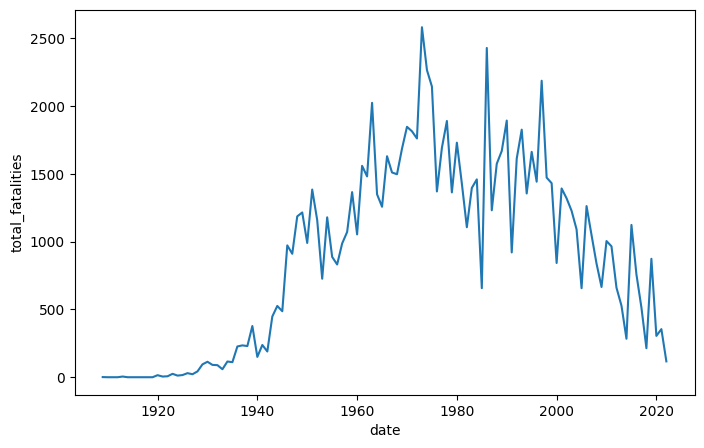

In [23]:
plt.figure(figsize=(8,5))
sns.lineplot(data=fatalities_by_year)

In [24]:
accidents_by_year = df.set_index('date').resample('y')['total_fatalities'].count()
accidents_by_year 

date
1908-12-31     1
1909-12-31     0
1910-12-31     0
1911-12-31     0
1912-12-31     1
              ..
2017-12-31    15
2018-12-31    19
2019-12-31    13
2020-12-31     8
2021-12-31     5
Freq: A-DEC, Name: total_fatalities, Length: 114, dtype: int64

Text(0, 0.5, 'Total accidents')

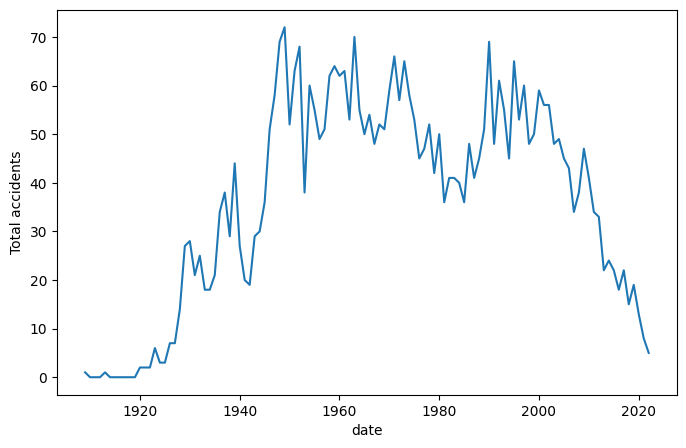

In [25]:
plt.figure(figsize=(8,5))
sns.lineplot(data=accidents_by_year)
plt.ylabel("Total accidents")

In [26]:
df['month'] = df['date'].dt.month

In [27]:
accidentes_by_month = df['month'].value_counts().to_frame().reset_index().sort_values('month')

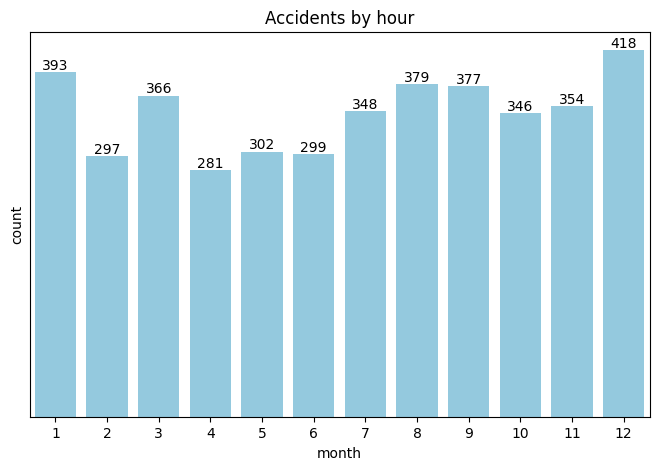

In [28]:
plt.figure(figsize=(8,5))
plt.title("Accidents by hour")
sns.barplot(data=accidentes_by_month, x="month", y="count", order=accidentes_by_month['month'], color="skyblue")
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2, height),
                       ha='center', va='bottom')
plt.yticks([],[])
plt.show()

In [29]:
top15_airline_operator = df['airline_operator'].value_counts().to_frame().reset_index().sort_values('count', ascending=False).head(15)

(0.0, 260.0)

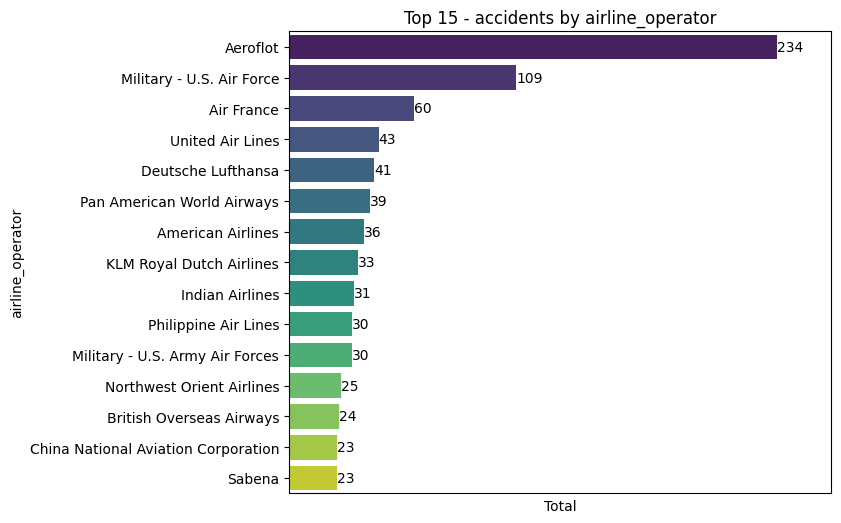

In [30]:
plt.figure(figsize=(7,6))
sns.barplot(data=top15_airline_operator, y="airline_operator", x="count", palette="viridis")
plt.title('Top 15 - accidents by airline_operator')
plt.xlabel('Total')
plt.ylabel('airline_operator')

for index, value in enumerate(top15_airline_operator["count"]):
    plt.text(value, index, str(value), ha='left', va='center')

plt.xticks([],[])
plt.xlim((0,260))

In [31]:
top15_aircraft_type  = df['aircraft_type'].value_counts().to_frame().reset_index().sort_values('count', ascending=False).head(15)

In [32]:
top15_aircraft_type

,aircraft_type,count
0,Douglas DC-3,284
1,de Havilland Canada DHC-6 Twin Otter 300,68
2,Douglas C-47A,53
3,Douglas C-47,46
4,Douglas DC-4,37
5,Yakovlev YAK-40,33
6,Douglas DC-6B,25
7,Junkers JU-52/3m,24
8,Antonov AN-26,24
9,Douglas C-47B,18


(0.0, 320.0)

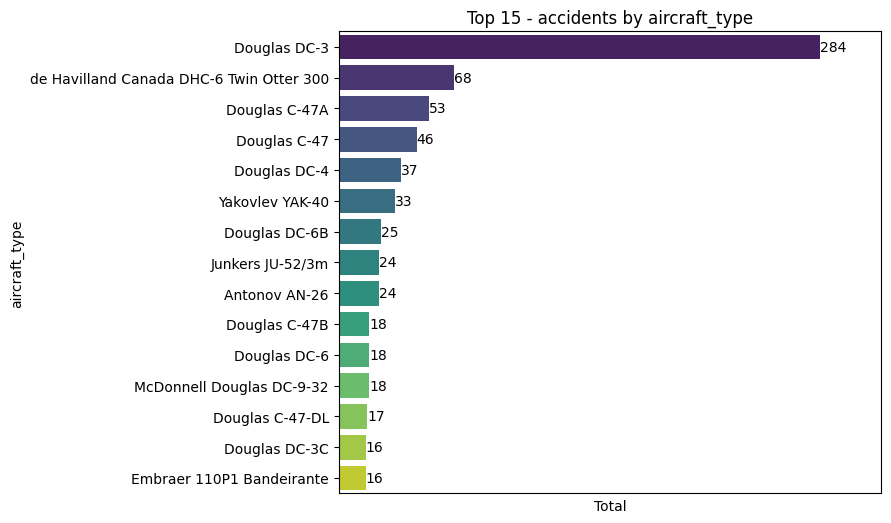

In [33]:
plt.figure(figsize=(7,6))
sns.barplot(data=top15_aircraft_type, y="aircraft_type", x="count", palette="viridis")
plt.title('Top 15 - accidents by aircraft_type')
plt.xlabel('Total')
plt.ylabel('aircraft_type')

for index, value in enumerate(top15_aircraft_type["count"]):
    plt.text(value, index, str(value), ha='left', va='center')

plt.xticks([],[])
plt.xlim((0,320))

In [34]:
# add column "mortality rate"
df['mortality rate'] = df['total_fatalities']/df['total_aboard']*100

In [35]:
df['mortality rate'].mean()

81.62311308195306

In [36]:
df.describe()

,date,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,month,mortality rate
count,4160,4160.000000,4160.000000,4160.000000,4160.000000,4160.000000,4160.000000,4160.000000,4158.000000
mean,1973-04-14 21:58:50.769230768,33.963462,29.325481,4.647837,24.324038,20.704327,3.701683,6.669231,81.623113
min,1908-09-17 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1953-12-14 06:00:00,7.000000,4.000000,2.000000,4.000000,1.000000,2.000000,3.000000,75.000000
50%,1972-04-21 00:00:00,18.000000,14.000000,4.000000,12.000000,9.000000,3.000000,7.000000,100.000000
75%,1993-09-21 06:00:00,39.000000,33.250000,6.000000,27.000000,23.000000,5.000000,10.000000,100.000000
max,2021-07-06 00:00:00,644.000000,614.000000,61.000000,583.000000,560.000000,33.000000,12.000000,100.000000
std,NaN,48.334737,46.234314,3.527145,37.465577,35.817081,3.128674,3.540202,31.362687


In [37]:
df[df["total_aboard"]>400]

,date,time,location,airline_operator,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,hour,month,mortality rate
2902,1977-03-27,1707,"Tenerife, Canary Islands",Pan American World Airways / KLM,Tenerife - Las Palmas / Tenerife - Las Palmas,Boeing B-747-121 / Boeing B-747-206B,644.0,614.0,30.0,583.0,560.0,23.0,17,3,90.527950
3341,1985-08-12,1856,"Mt. Osutaka, near Ueno Village, Japan",Japan Air Lines,Tokyo - Osaka,Boeing B-747-SR46,524.0,509.0,15.0,520.0,505.0,15.0,18,8,99.236641
4219,1999-07-23,1125,"Tokyo, Japan",All Nippon Airways,"Tokyo, Japan - Chitose, Japan",Boeing B-747,517.0,503.0,14.0,1.0,0.0,1.0,11,7,0.193424


In [38]:
df[df["total_aboard"]==0]

,date,time,location,airline_operator,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,hour,month,mortality rate
120,1927-01-12,NaN,"Estaires, France",Fokker,Delivery flight,Fokker F-VII,0.0,0.0,2.0,0.0,0.0,2.0,NaN,1,NaN
1121,1949-07-13,NaN,"Jamnagar, Gujarat state, India",Indian Air Force,Training,Hawker Hunter,0.0,1.0,1.0,0.0,1.0,1.0,NaN,7,NaN


In [39]:
# We fix the inconsistency
df.loc[df["total_aboard"] == 0, 'total_aboard'] = df[df["total_aboard"] == 0]['passengers_aboard'] + df[df["total_aboard"] == 0]['crew_aboard']

<Axes: xlabel='total_aboard', ylabel='Count'>

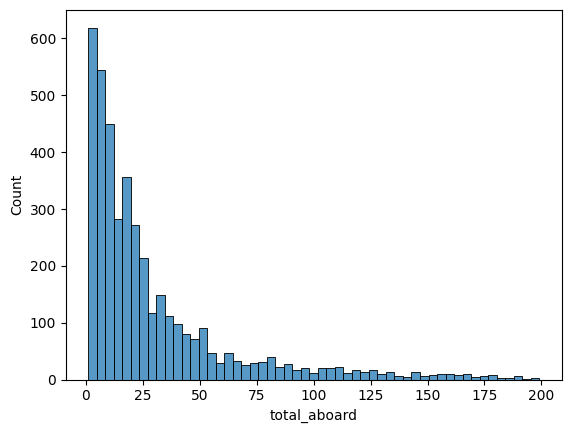

In [40]:
sns.histplot(data=df[df['total_aboard']<200], x="total_aboard")

In [41]:
df[df['crew_aboard']>40]

,date,time,location,airline_operator,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,hour,month,mortality rate
102,1925-09-03,0530,"Caldwell, Ohio",Military - U.S. Navy,"Lakehurst, NJ - S.t Louis, MO",Dirigible ZR-1 Shenandoah (airship),43.0,0.0,43.0,14.0,0.0,14.0,05,9,32.558140
462,1937-05-06,1925,"Lakehurst, New Jersey",Deutsche Zeppelin Reederei,Frankfurt - Lakehurst N.J.,Zeppelin LZ-129,97.0,36.0,61.0,35.0,13.0,22.0,19,5,36.082474


<Axes: xlabel='crew_aboard', ylabel='Count'>

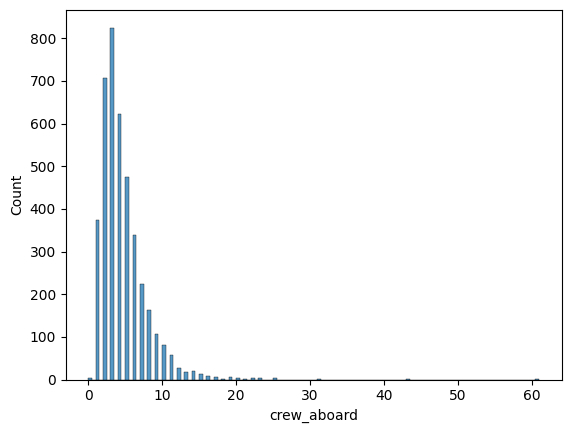

In [42]:
sns.histplot(data=df[df['total_aboard']<200], x="crew_aboard")

In [43]:
df.location.value_counts()

location
Moscow, Russia                  15
Manila, Philippines             14
New York, New York              13
Rio de Janeiro, Brazil          11
Sao Paulo, Brazil               11
                                ..
Near Salto, Uruguay              1
Agana, Guam, Mariana Islands     1
Off Naha, Okinawa                1
Campbell Lake, Quebec Canada     1
Palana, Russia                   1
Name: count, Length: 3455, dtype: int64

In [44]:
df['country_or_city'] = df['location']
df.loc[(df.location.str.contains(','), 'country_or_city')] = df['country_or_city'].str.split(',').str.get(1).str.strip()

In [45]:
accidents_by_country_or_city = df.country_or_city.value_counts().to_frame().reset_index().sort_values('count', ascending=False).head(15)
accidents_by_country_or_city

,country_or_city,count
0,Russia,229
1,Brazil,139
2,Colombia,130
3,California,99
4,Alaska,86
5,France,86
6,Indonesia,76
7,Mexico,75
8,India,75
9,Italy,73


(0.0, 250.0)

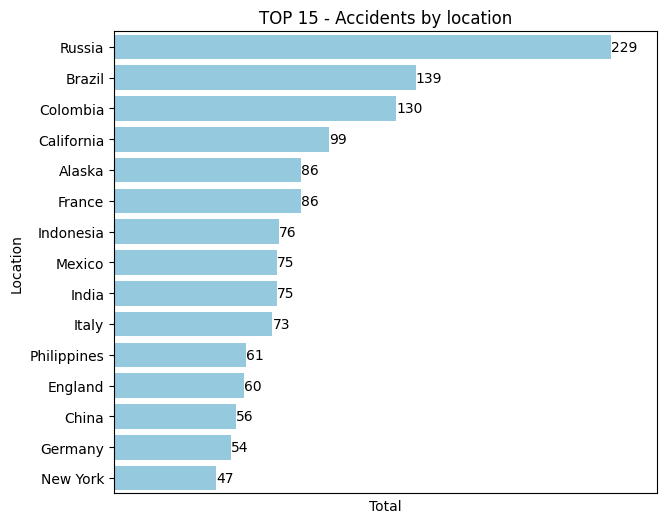

In [46]:
plt.figure(figsize=(7,6))
sns.barplot(data=accidents_by_country_or_city, y="country_or_city", x="count", color="skyblue")
plt.title('TOP 15 - Accidents by location')
plt.xlabel('Total')
plt.ylabel('Location')

for index, value in enumerate(accidents_by_country_or_city["count"]):
    plt.text(value, index, str(value), ha='left', va='center')

plt.xticks([],[])
plt.xlim((0,250))

In [47]:
accidents_by_route = df.route.value_counts().to_frame().reset_index().sort_values('count', ascending=False).head(15)

(0.0, 100.0)

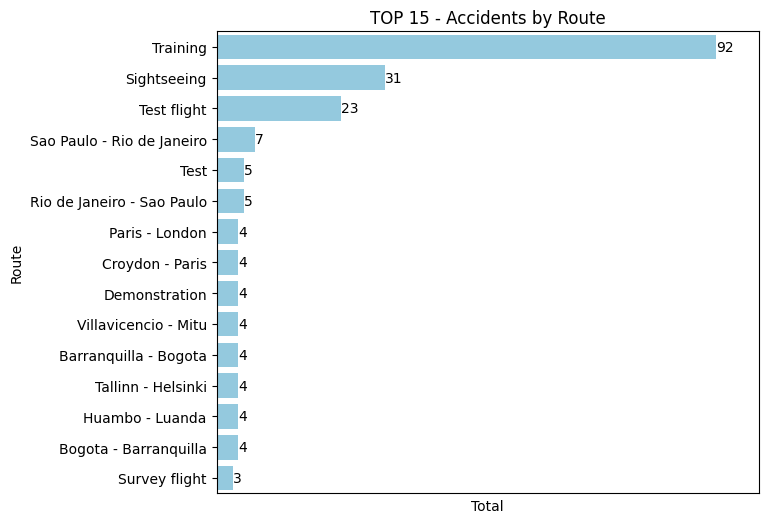

In [48]:
plt.figure(figsize=(7,6))
sns.barplot(data=accidents_by_route, y="route", x="count", color="skyblue")
plt.title('TOP 15 - Accidents by Route')
plt.xlabel('Total')
plt.ylabel('Route')

for index, value in enumerate(accidents_by_route["count"]):
    plt.text(value, index, str(value), ha='left', va='center')

plt.xticks([],[])
plt.xlim((0,100))